# IPL MATCH DATASET

In [2]:
import pandas as pd
matches_data=pd.read_csv(r"C:\Users\HP\Downloads\matches.csv")
matches_data.head()

,match_id,season,city,date,team 1,team2,toss_winners,toss_decision,result,winners,venue
0,1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,M Chinnaswamy Stadium
1,2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali"
2,3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,Feroz Shah Kotla
3,4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,Wankhede Stadium
4,5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,Eden Gardens


In [3]:
# 1.Which team won the most matches in 2008?
matches_2008 = matches_data[matches_data["season"] == 2008]
matches_2008["winners"].value_counts().head(1)

winners
Rajasthan Royals    13
Name: count, dtype: int64

In [12]:
# 2.Which city hosted the highest number of matches?
matches_data["city"].value_counts().head(1)


city
Mumbai    77
Name: count, dtype: int64

In [14]:
# 3.Which team won more often while batting first?
bat_first = matches_data[matches_data["toss_decision"] == "bat"]
bat_first["winners"].value_counts().head(1)


winners
Chennai Super Kings    50
Name: count, dtype: int64

In [15]:
# 4. Which team won more often while fielding first?
field_first = matches_data[matches_data["toss_decision"] == "field"]
field_first["winners"].value_counts().head(1)

winners
Royal Challengers Bangalore    46
Name: count, dtype: int64

In [17]:
# 5. Does winning the toss increase the chance of winning?
toss_winner_wins = (matches_data["toss_winners"] == matches_data["winners"]).sum()
total_matches = len(matches_data)

print("Toss win → Match win %:", (toss_winner_wins / total_matches) * 100)

Toss win → Match win %: 50.43327556325823


In [19]:
# 6.Which toss decision (bat or field) leads to more wins?
winner_toss_decision = matches_data[matches_data["toss_winners"] == matches_data["winners"]]
winner_toss_decision["toss_decision"].value_counts()

toss_decision
field    173
bat      118
Name: count, dtype: int64

In [20]:
# 7.Which stadium hosted the most matches?
matches_data["venue"].value_counts().head(1)

venue
M Chinnaswamy Stadium    58
Name: count, dtype: int64

In [22]:
# 8.Which venue saw the most wins for home teams?
home_wins = matches_data[matches_data["team 1"] == matches_data["winners"]]
home_wins["venue"].value_counts().head(1)


venue
MA Chidambaram Stadium, Chepauk    31
Name: count, dtype: int64

In [24]:
# 9. Which venue saw the most wins for away teams?
away_wins = matches_data[matches_data["team2"] == matches_data["winners"]]
away_wins["venue"].value_counts().head(1)

venue
Eden Gardens    34
Name: count, dtype: int64

In [26]:
# 10. Is there any relationship between toss winner and match winner?
same = (matches_data["toss_winners"] == matches_data["winners"]).sum()
total = len(matches_data)
print("Percentage:", (same / total) * 100)

Percentage: 50.43327556325823


In [28]:
# 11.Which team had the highest win percentage?
win_percent = (matches_data["winners"].value_counts() / len(matches_data)) * 100
win_percent.head(1)

winners
Mumbai Indians    13.864818
Name: count, dtype: float64

In [30]:
# 12.How often did the team winning the toss lose the match?
lose_count = (matches_data["toss_winners"] != matches_data["winners"]).sum()
print("Toss winner lost %:", (lose_count / len(matches_data)) * 100)

Toss winner lost %: 49.566724436741765


In [33]:
# 13. Which city’s teams performed the best overall?
matches_data["winners"].value_counts().head(1)

winners
Mumbai Indians    80
Name: count, dtype: int64

In [34]:
# 14. What percentage of matches were won by batting first vs fielding first?
bat_wins = matches_data[matches_data["toss_decision"] == "bat"]["winners"].count()
field_wins = matches_data[matches_data["toss_decision"] == "field"]["winners"].count()
total = len(matches_data)

print("Bat First %:", (bat_wins/total)*100)
print("Field First %:", (field_wins/total)*100)


Bat First %: 45.233968804159446
Field First %: 54.24610051993067


In [36]:
# 15.Which team lost the most tosses but still won matches?
# Toss lost but match won
lost_toss_won_match = matches_data[matches_data["toss_winners"] != matches_data["winners"]]
lost_toss_won_match["winners"].value_counts().head(1)

winners
Mumbai Indians    39
Name: count, dtype: int64

In [37]:
# 16.Are there cities where fielding first gives a higher chance of winning?
field_city = matches_data[matches_data["toss_decision"] == "field"]
field_city["city"].value_counts().head()

city
Bangalore     50
Mumbai        44
Delhi         31
Chandigarh    26
Kolkata       26
Name: count, dtype: int64

In [39]:
# 17.Which toss decision is more successful at each venue?
success_by_venue = matches_data[matches_data["toss_winners"] == matches_data["winners"]]
success_by_venue.groupby("venue")["toss_decision"].value_counts()

venue                                                 toss_decision
Barabati Stadium                                      field             3
                                                      bat               2
Brabourne Stadium                                     bat               4
                                                      field             3
Buffalo Park                                          bat               2
De Beers Diamond Oval                                 bat               1
                                                      field             1
Dr DY Patil Sports Academy                            field             6
                                                      bat               3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium   bat               2
                                                      field             2
Dubai International Cricket Stadium                   field             2
                                            

In [42]:
# 18.Which team won matches most frequently in their home city?
home_city_wins = matches_data[matches_data["team 1"] == matches_data["winners"]]
home_city_wins["winners"].value_counts().head(1)

winners
Chennai Super Kings    45
Name: count, dtype: int64

In [44]:
# 19. Which opponent teams faced each other most often?
matches_data["team_pair"] = matches_data.apply(lambda x: tuple(sorted([x["team 1"], x["team2"]])), axis=1)
matches_data["team_pair"].value_counts().head(1)

team_pair
(Chennai Super Kings, Mumbai Indians)    22
Name: count, dtype: int64

In [46]:
# 20. Are there stadiums where the same team keeps winning?
venue_dominance = matches_data.groupby(["venue", "winners"]).size()
venue_dominance.sort_values(ascending=False).head(5)

venue                            winners                    
Eden Gardens                     Kolkata Knight Riders          33
MA Chidambaram Stadium, Chepauk  Chennai Super Kings            33
M Chinnaswamy Stadium            Royal Challengers Bangalore    29
Wankhede Stadium                 Mumbai Indians                 29
Sawai Mansingh Stadium           Rajasthan Royals               24
dtype: int64

In [47]:
# 21.Average number of matches played per city
matches_per_city = matches_data["city"].value_counts()
matches_per_city.mean()

np.float64(19.0)

In [49]:
# 22.Which teams appeared in the most matches?
appearances = matches_data["team 1"].value_counts() + matches_data["team2"].value_counts()
appearances.sort_values(ascending=False).head(1)

Mumbai Indians    140
Name: count, dtype: int64

In [51]:
# 23.Which team won the most matches after losing the toss?
lost_toss_wins = matches_data[matches_data["toss_winners"] != matches_data["winners"]]
lost_toss_wins["winners"].value_counts().head(1)

winners
Mumbai Indians    39
Name: count, dtype: int64

In [8]:
# 24.Are there venues where the toss winner always wins?
# Only select necessary columns to avoid the warning
venue_toss_always_win = matches_data.groupby("venue")[["toss_winners", "winners"]].apply(
    lambda x: (x["toss_winners"] == x["winners"]).all()
)

# Count matches at each venue
matches_count = matches_data["venue"].value_counts()

# Combine results
final_output = pd.concat([venue_toss_always_win, matches_count], axis=1)
final_output.columns = ["Toss Always Win", "Match Count"]

# Filter only True venues
final_output[final_output["Toss Always Win"] == True]


,Toss Always Win,Match Count
venue,,
Green Park,True,2
Holkar Cricket Stadium,True,2
OUTsurance Oval,True,2


In [54]:
# 25.What percentage of matches were won by the team that chose to bat?
bat_chosen = matches_data[matches_data["toss_decision"] == "bat"]
bat_decision_win = (bat_chosen["toss_winners"] == bat_chosen["winners"]).sum()
print("Bat decision win %:", (bat_decision_win / len(bat_chosen)) * 100)

Bat decision win %: 45.038167938931295


In [55]:
# 26. What percentage of matches were won by the team that chose to field?
field_chosen = matches_data[matches_data["toss_decision"] == "field"]
field_decision_win = (field_chosen["toss_winners"] == field_chosen["winners"]).sum()
print("Field decision win %:", (field_decision_win / len(field_chosen)) * 100)

Field decision win %: 54.920634920634924


In [56]:
# 27. Which city has the most balanced win distribution among teams?
city_balance = matches_data.groupby(["city", "winners"]).size()
city_balance.head()

city       winners              
Abu Dhabi  Chennai Super Kings      1
           Kings XI Punjab          2
           Kolkata Knight Riders    1
           Rajasthan Royals         3
Ahmedabad  Delhi Daredevils         1
dtype: int64

In [57]:
#  28.Are there any cities where one team dominated completely?
city_domination = matches_data.groupby(["city", "winners"]).size()
city_domination.sort_values(ascending=False).head(5)


city       winners                    
Mumbai     Mumbai Indians                 40
Kolkata    Kolkata Knight Riders          33
Chennai    Chennai Super Kings            33
Bangalore  Royal Challengers Bangalore    29
Jaipur     Rajasthan Royals               24
dtype: int64

In [59]:
# 29.Toss-winning trends for top-performing teams
top_teams = matches_data["winners"].value_counts().head(5).index
for team in top_teams:
    team_matches = matches_data[matches_data["winners"] == team]
    toss_win = (team_matches["winners"] == team_matches["toss_winners"]).sum()
    print(team, "toss win count:", toss_win)


Mumbai Indians toss win count: 41
Chennai Super Kings toss win count: 42
Royal Challengers Bangalore toss win count: 33
Kolkata Knight Riders toss win count: 38
Rajasthan Royals toss win count: 34


In [60]:
# 30. Ideal toss decision for each city
ideal_decision_per_city = matches_data.groupby(["city", "toss_decision"])["winners"].count()
ideal_decision_per_city

city            toss_decision
Abu Dhabi       bat               4
                field             3
Ahmedabad       bat               6
                field             6
Bangalore       bat               8
                field            48
Bloemfontein    bat               1
                field             1
Cape Town       bat               4
                field             3
Centurion       bat               6
                field             6
Chandigarh      bat              16
                field            26
Chennai         bat              34
                field            14
Cuttack         bat               2
                field             5
Delhi           bat              21
                field            31
Dharamsala      bat               1
                field             8
Durban          bat              10
                field             5
East London     bat               3
Hyderabad       bat              20
                field            2

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

matches = pd.read_csv(r"C:\Users\HP\Downloads\matches.csv")


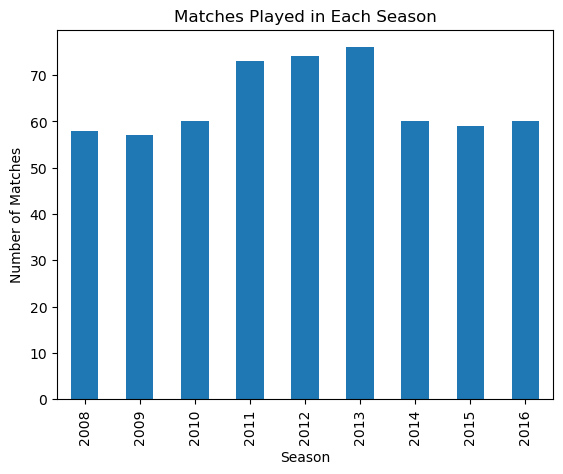

In [8]:
# 31.Plot the number of matches played each season
season_count = matches['season'].value_counts().sort_index()
season_count.plot(kind='bar')
plt.title("Matches Played in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


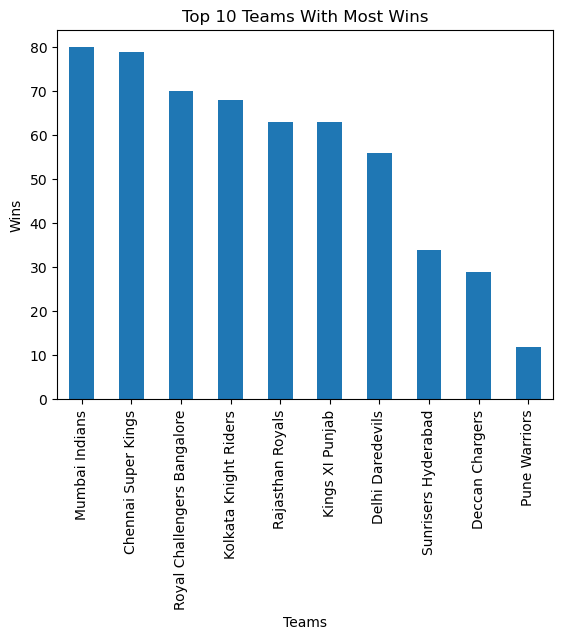

In [9]:
# 32. Plot Top 10 teams with most wins
wins = matches['winners'].value_counts().head(10)
wins.plot(kind='bar')
plt.title("Top 10 Teams With Most Wins")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.show()

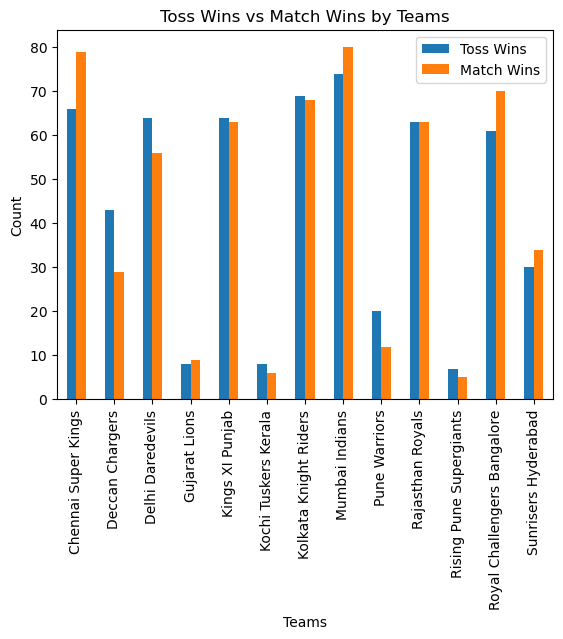

In [11]:
# 33.Plot Toss wins vs Match wins for each team
toss_wins = matches['toss_winners'].value_counts()
match_wins = matches['winners'].value_counts()

df = pd.DataFrame({
    'Toss Wins': toss_wins,
    'Match Wins': match_wins
}).fillna(0)

df.plot(kind='bar')
plt.title("Toss Wins vs Match Wins by Teams")
plt.xlabel("Teams")
plt.ylabel("Count")
plt.show()

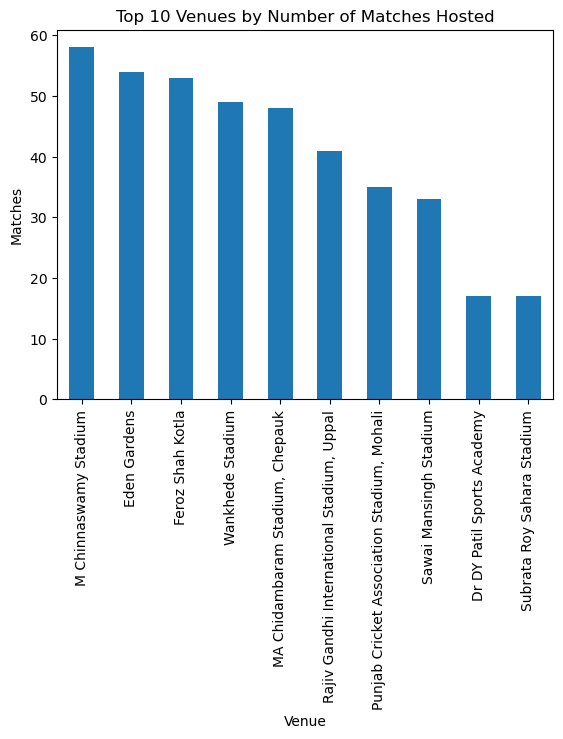

In [12]:
# 34.Plot the number of matches hosted by top 10 venues
venue_count = matches['venue'].value_counts().head(10)
venue_count.plot(kind='bar')
plt.title("Top 10 Venues by Number of Matches Hosted")
plt.xlabel("Venue")
plt.ylabel("Matches")
plt.show()


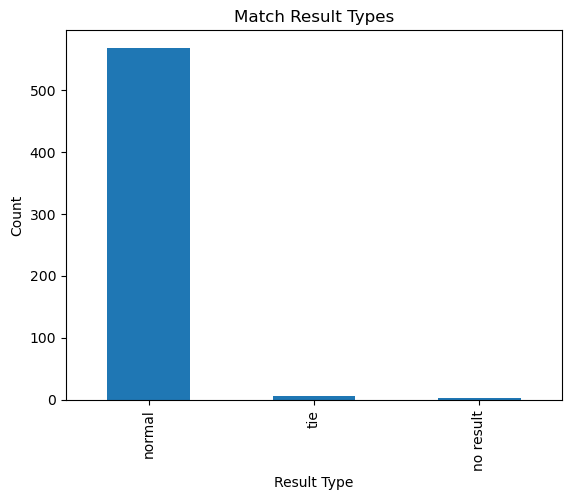

In [14]:
# 35.Plot match result types (Normal win vs Super Over)
result = matches['result'].value_counts()
result.plot(kind='bar')
plt.title("Match Result Types")
plt.xlabel("Result Type")
plt.ylabel("Count")
plt.show()

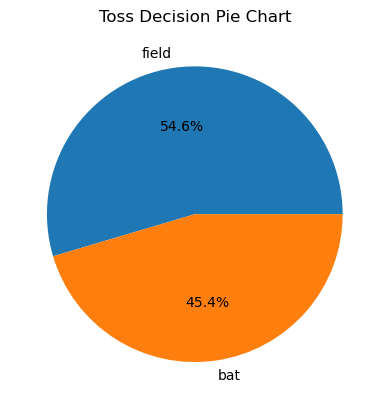

In [15]:
# 36.Pie Chart — Toss Decision (Bat vs Field)
decision = matches['toss_decision'].value_counts()
decision.plot(kind='pie', autopct='%1.1f%%')
plt.title("Toss Decision Pie Chart")
plt.ylabel("")
plt.show()


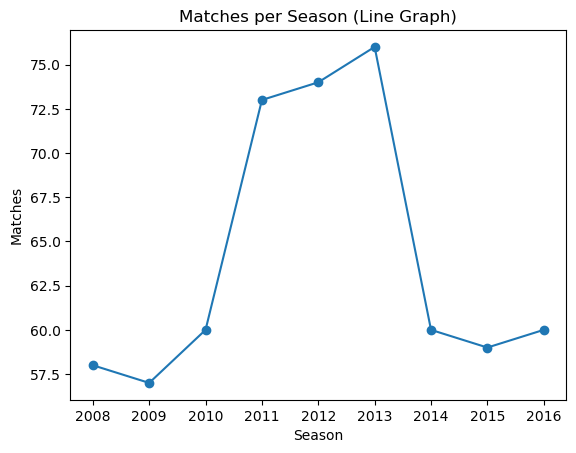

In [16]:
# 37.Line Chart — Matches per Season
season_count = matches['season'].value_counts().sort_index()
season_count.plot(kind='line', marker='o')
plt.title("Matches per Season (Line Graph)")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()


In [17]:
# 38.tacked Bar — Bat First vs Field First Wins per Season
bat_win = matches[matches['win_by_runs'] > 0].groupby('season').size()
field_win = matches[matches['win_by_wickets'] > 0].groupby('season').size()

df = pd.DataFrame({'Bat First Wins': bat_win, 'Field First Wins': field_win}).fillna(0)
df.plot(kind='bar', stacked=True)
plt.title("Wins by Batting vs Fielding — Season Wise")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.show()

KeyError: 'win_by_runs'